In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
# loads the image data into the variable "data":
data = np.load('/content/drive/MyDrive/Colab Notebooks/Face-mask /Training/data.npy')

In [ ]:
#loads the labels of the corresponding images into the "target" variable:
#converts labels from binary numbers into two-dimensional matrices:
target = np.load('/content/drive/MyDrive/Colab Notebooks/Face-mask /Training/target.npy')
target = tf.keras.utils.to_categorical(target)
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

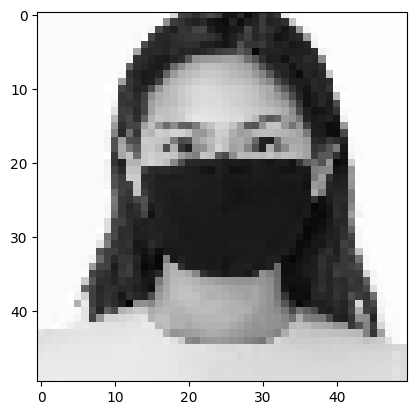

In [ ]:
#display images from a "data" dataset with an index of 800:
plt.imshow(data[800],cmap='gray')

In [ ]:
#displays the label corresponding to the image with index 800 in the dataset.
target[800]

array([0., 1.], dtype=float32)

In [ ]:
#make a copy of the original image dataset
odata = data.copy()
#create a list to store RGB image which coverted
ndata = []

#Convert grayscale photos to RGB color photos:
for i in odata:
    #transform each image from (height, width) to (height, width, 1)
    image = i.reshape((*i.shape,1))
    #converts the image array to tensor, because the function that requires the input is tensor
    image = tf.convert_to_tensor(image)
    #normalized (bringing it between 0 and 1) by dividing by 255 and added to the "ndata" list
    ndata.append(tf.image.grayscale_to_rgb(image).numpy()/255.)

data = ndata.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#returns the size of the "data" array
np.shape(data)

(6000, 50, 50, 3)

In [ ]:
#divides the "data" and "target" labels into two separate datasets: a training dataset and a test dataset
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.33, random_state = 215217, shuffle = True)
#convert them into NumPy arrays for use during the model's training and testing.
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train.shape

(4020, 2)

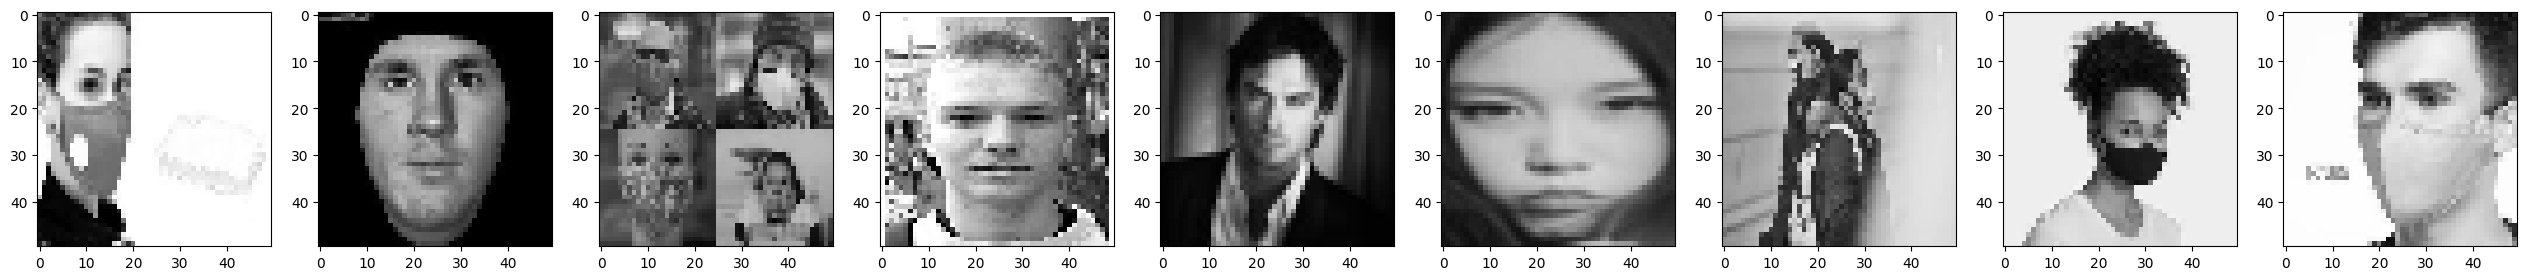

In [ ]:
#creates a 3x3 grid and randomly displays 9 images from the "X_train" training dataset as grayscales
plt.figure(figsize=[32,32])

for i in np.arange(1,10):
    plt.subplot(int(f"19{i}"))
    plt.imshow(X_train[np.random.randint(0,1403)], cmap='gray')

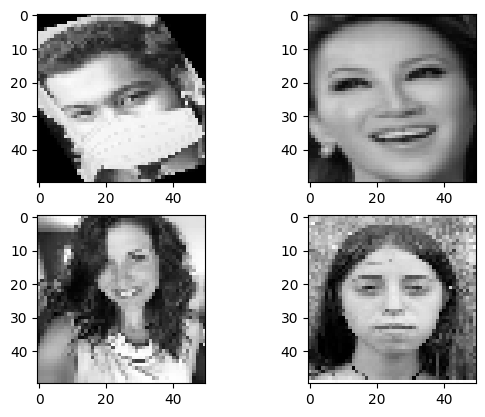

In [ ]:
#creates a 2x2 grid (4 in total) random gray images from the "X_train" training dataset.
plt.subplot(221)
plt.imshow(X_train[np.random.randint(0,1440)], cmap='gray')
plt.subplot(222)
plt.imshow(X_train[np.random.randint(0,1440)], cmap='gray')
plt.subplot(223)
plt.imshow(X_train[np.random.randint(0,1440)], cmap='gray')
plt.subplot(224)
plt.imshow(X_train[np.random.randint(0,1440)], cmap='gray')

In [ ]:
#displays the label corresponding to the first sample in the "trainy" training dataset.
Y_train[0]

array([1., 0.], dtype=float32)

In [ ]:
img_shape = X_train[0].shape
img_shape

(50, 50, 3)



# ***Convolutional neural network (CNN) model***

In [ ]:
model=Sequential()

model.add(layers.Conv2D(32,(3,3), input_shape = img_shape))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2, activation = 'softmax'))

adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 activation (Activation)     (None, 22, 22, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         7

In [ ]:
history = model.fit(x = X_train, y = Y_train, batch_size = 100, epochs = 50, validation_split = 0.2, verbose = 2, shuffle = True)

Epoch 1/50
33/33 - 13s - loss: 0.6883 - accuracy: 0.5513 - val_loss: 0.6428 - val_accuracy: 0.6393 - 13s/epoch - 404ms/step
Epoch 2/50
33/33 - 0s - loss: 0.6042 - accuracy: 0.6744 - val_loss: 0.4979 - val_accuracy: 0.7674 - 331ms/epoch - 10ms/step
Epoch 3/50
33/33 - 0s - loss: 0.4437 - accuracy: 0.7926 - val_loss: 0.3866 - val_accuracy: 0.8122 - 335ms/epoch - 10ms/step
Epoch 4/50
33/33 - 0s - loss: 0.3625 - accuracy: 0.8374 - val_loss: 0.2834 - val_accuracy: 0.8794 - 345ms/epoch - 10ms/step
Epoch 5/50
33/33 - 0s - loss: 0.3256 - accuracy: 0.8554 - val_loss: 0.2929 - val_accuracy: 0.8719 - 355ms/epoch - 11ms/step
Epoch 6/50
33/33 - 0s - loss: 0.2455 - accuracy: 0.8977 - val_loss: 0.2455 - val_accuracy: 0.9030 - 333ms/epoch - 10ms/step
Epoch 7/50
33/33 - 0s - loss: 0.2146 - accuracy: 0.9095 - val_loss: 0.2179 - val_accuracy: 0.9117 - 377ms/epoch - 11ms/step
Epoch 8/50
33/33 - 0s - loss: 0.1863 - accuracy: 0.9210 - val_loss: 0.2092 - val_accuracy: 0.9167 - 354ms/epoch - 11ms/step
Epoch 9/

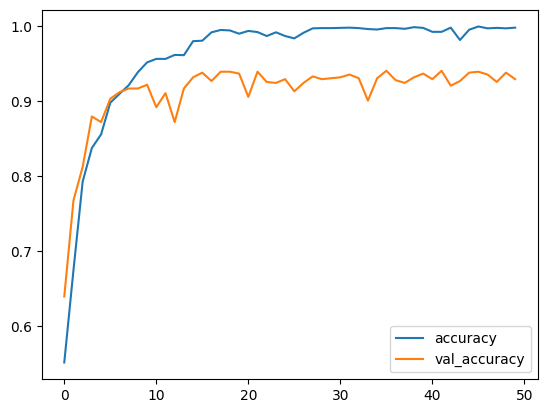

In [ ]:
#This line graphs the model's accuracy on the training dataset through each epoch.
plt.plot(history.history['accuracy']) 
#This line graphs the performance of the model on the test set through each epoch.
plt.plot(history.history['val_accuracy']) 
plt.legend(['accuracy', 'val_accuracy'])

In [ ]:
#calculates the loss and accuracy of the model on the test dataset (testx) and test label (testy).
model.evaluate(X_test, Y_test)

62/62 [==============================] - 1s 6ms/step - loss: 0.4943 - accuracy: 0.9227


[0.49434638023376465, 0.9227272868156433]

In [ ]:
#save the trained model as a file in
model.save('/content/drive/MyDrive/Colab Notebooks/Face-mask /Classification/CNN.h5')